## TP3 Filtrage Spatial
#  Travail élaboré par Rim Ben Abdeljelil et Souha Khanchel

### 1. Premiers pas : convolution avec python

In [32]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt
def displayTwoBaWImages(img1, img2):
    _, axes = plt.subplots(ncols=2)
    axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
    axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

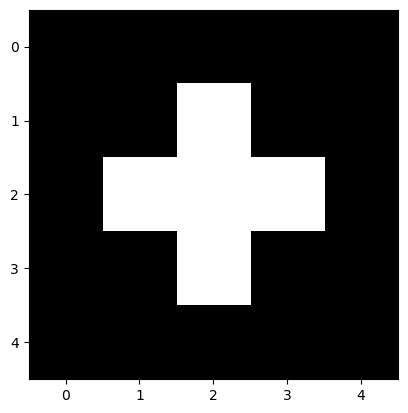

In [33]:
image_test = np.array([[0,0,0,0,0], 
 [0,0,1,0,0], 
[0,1,1,1,0], 
[0,0,1,0,0], 
[0,0,0,0,0]])
imshow(image_test, 
 cmap=get_cmap('gray'))


In [34]:
kernel = np.ones((3,3), np.float32)/2

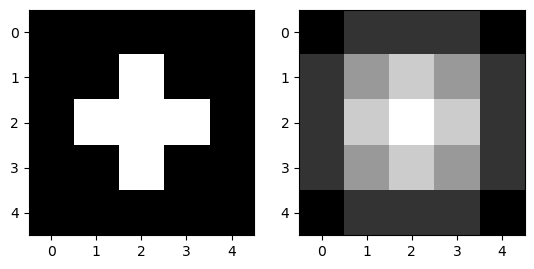

In [35]:
imgconvol = signal.convolve2d(image_test, 
 kernel, 
mode='same',
boundary='fill', 
fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

## 2. Détection des contours

In [36]:
kernel_contour = np.array([[0,1,0], 
 [1,-4,1], 
[0,1,0]])

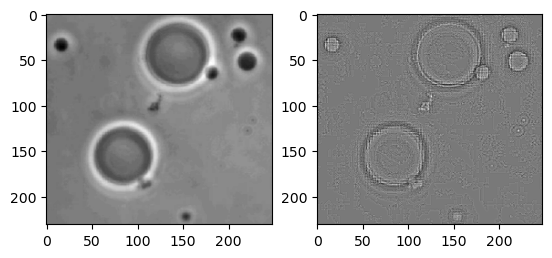

In [37]:
import cv2 as cv
path = "cell_image.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgconvol = signal.convolve2d(grayimg, 
 kernel_contour, 
boundary='symm', 
mode='same')
displayTwoBaWImages(grayimg, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

## 3.Augmentation de contraste

In [38]:
kernel_inccontrast = np.array([[0,0,0,0,0], 
 [0,0,-1,0,0], 
[0,-1,5,-1,0], 
 [0,0,-1,0,0], 
[0,0,0,0,0]])


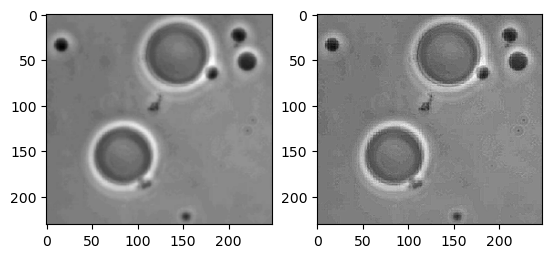

In [39]:
imgcontrast = signal.convolve2d(grayimg, 
 kernel_inccontrast, 
boundary='symm', 
mode='same')
displayTwoBaWImages(grayimg, imgcontrast)

## 4. Filtre Gaussien

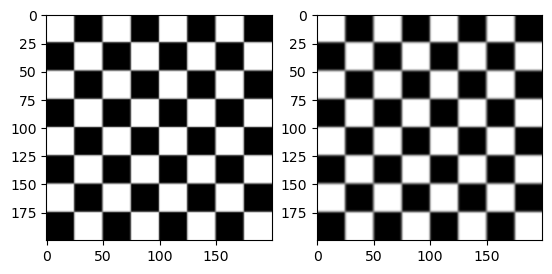

In [40]:
kernel = np.array([[0,0,0,0,0], 
 [0,1,2,1,0], 
[0,2,4,2,0], 
 [0,1,2,1,0], 
[0,0,0,0,0]])/16
img = signal.convolve2d(data.checkerboard(), 
 kernel, 
boundary='symm', 
mode='same')
displayTwoBaWImages(data.checkerboard(), img)

## Filtrage différentiel

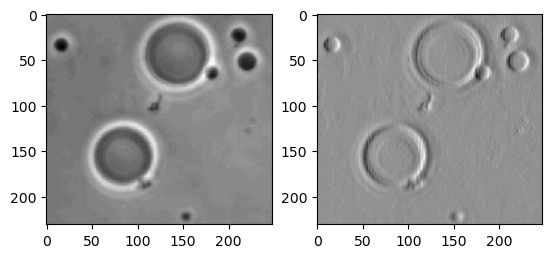

In [41]:
#Prewitt in one direction
kernel = np.array([[1,0,-1], 
 [1,0,-1,], 
 [1,0,-1,]])
img = signal.convolve2d(grayimg, 
 kernel, 
boundary='symm', 
mode='same')
displayTwoBaWImages(grayimg, img)


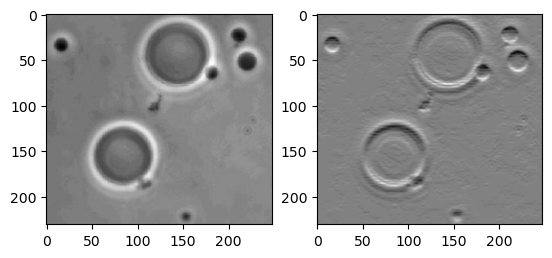

In [42]:
#Prewitt in the other direction
kernel = np.array([[1,1,1], 
 [0,0,0,], 
[-1,-1,-1,]])
img = signal.convolve2d(grayimg, 
 kernel, 
boundary='symm', 
mode='same')
displayTwoBaWImages(grayimg, img)

## Travail demandé

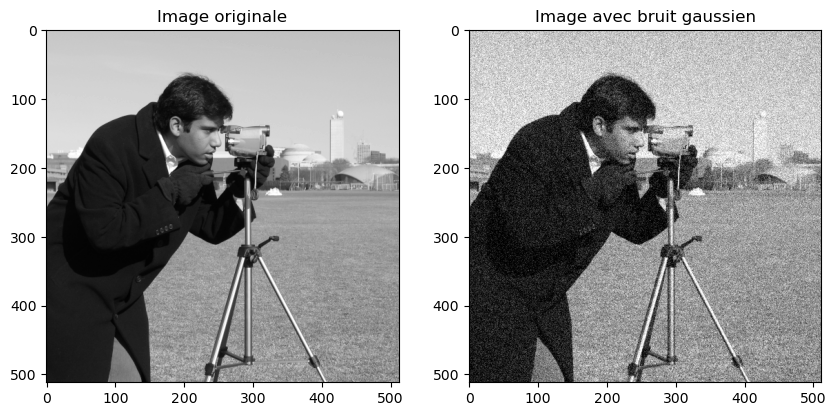

In [43]:
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from skimage.util import random_noise

# Charger l'image du cameraman
camera = skimage.data.camera()

# Ajouter un bruit gaussien additif à l'image avec une variance de 0.01
imGauss = random_noise(camera, mode='gaussian', var=0.01)

# Convertir l'image en float
imGauss = img_as_float(imGauss)

# Afficher l'image originale et l'image avec le bruit gaussien
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(camera, cmap='gray')
ax[0].set_title("Image originale")

ax[1].imshow(imGauss, cmap='gray')
ax[1].set_title("Image avec bruit gaussien")

plt.show()

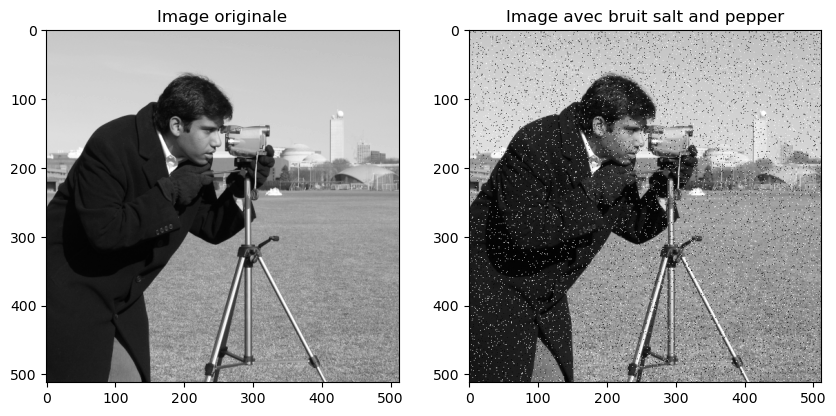

In [44]:
#Application d'un bruit salt and pepper
imSP = random_noise(camera, mode='s&p')

# Convertir l'image en float 
imSP = img_as_float(imSP)

# Afficher l'image avec le bruit ajouté
# Afficher l'image originale et l'image avec le bruit "salt and pepper"
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(camera, cmap='gray')
ax[0].set_title("Image originale")

ax[1].imshow(imSP, cmap='gray')
ax[1].set_title("Image avec bruit salt and pepper")

plt.show()

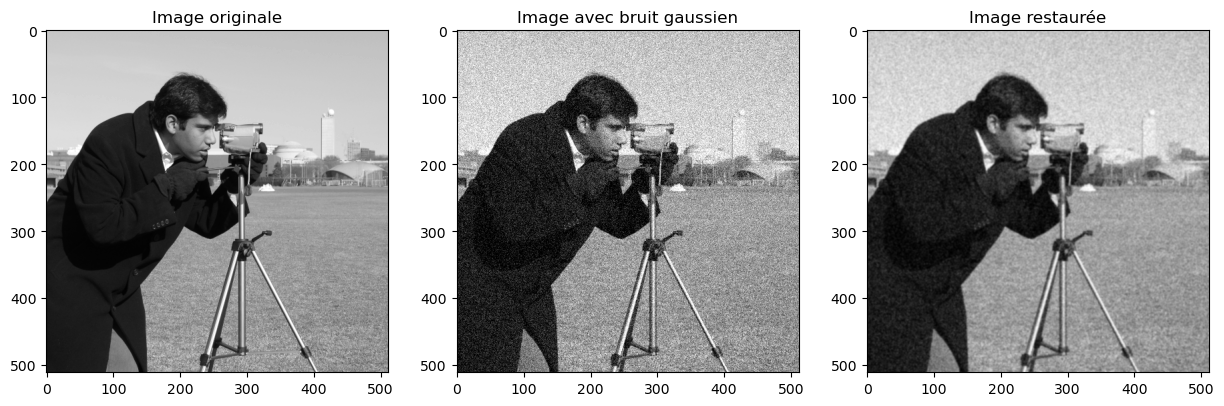

In [45]:
from scipy.ndimage import median_filter, gaussian_filter
imGauss_restored = gaussian_filter(imGauss, sigma=1) # Filtre gaussien

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
ax = axes.ravel()

ax[0].imshow(camera, cmap='gray')
ax[0].set_title("Image originale")

ax[1].imshow(imGauss, cmap='gray')
ax[1].set_title("Image avec bruit gaussien")

ax[2].imshow(imGauss_restored, cmap='gray')
ax[2].set_title("Image restaurée")

plt.show()

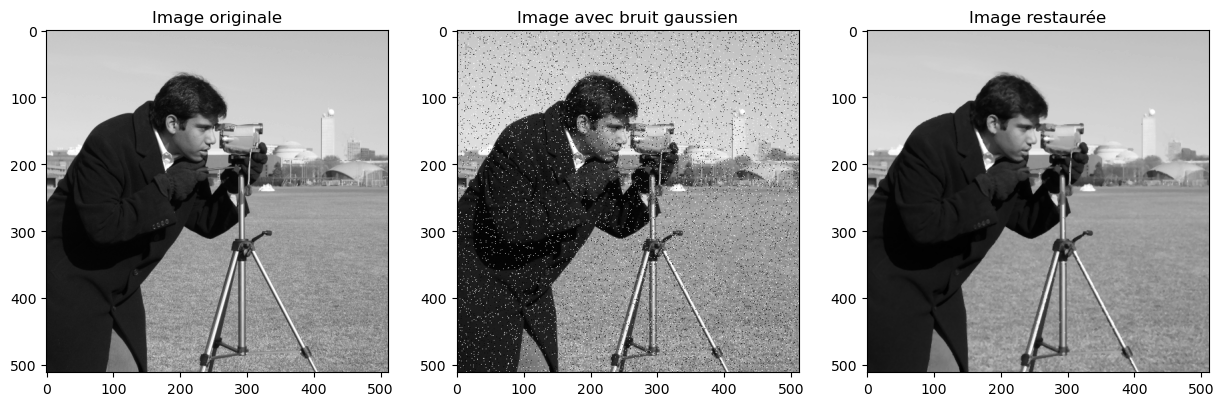

In [46]:
from scipy.ndimage import median_filter
restored_imSP = median_filter(imSP, size=3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
ax = axes.ravel()

ax[0].imshow(camera, cmap='gray')
ax[0].set_title("Image originale")

ax[1].imshow(imSP, cmap='gray')
ax[1].set_title("Image avec bruit gaussien")

ax[2].imshow(restored_imSP, cmap='gray')
ax[2].set_title("Image restaurée")

plt.show()

In [47]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error
psnr_imGauss = peak_signal_noise_ratio(camera,imGauss_restored)
mse_imGauss = mean_squared_error(camera,imGauss_restored)
print('Restauration de l\'image avec bruit gaussien:')
print("PSNR : {:.2f}".format(psnr_imGauss))
print("MSE : {:.2f}".format(mse_imGauss))

Restauration de l'image avec bruit gaussien:
PSNR : 4.72
MSE : 21908.48


C:\Users\rimba\AppData\Local\Temp\ipykernel_15072\3264550626.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_imGauss = peak_signal_noise_ratio(camera,imGauss_restored)


In [48]:
psnr_imSP = peak_signal_noise_ratio(camera, restored_imSP)
mse_imSP = mean_squared_error(camera, restored_imSP)
print("PSNR : {:.2f}".format(psnr_imSP))
print("MSE : {:.2f}".format(mse_imSP))

PSNR : 4.72
MSE : 21908.01


C:\Users\rimba\AppData\Local\Temp\ipykernel_15072\3427975207.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_imSP = peak_signal_noise_ratio(camera, restored_imSP)


## Interprétation